# Gradient Descent

Gradient descent is a way to ``minimize an objective function`` $J(\theta)$ parameterized by a model's parameters $\theta \in R^d$ by updating the parameters in the opposite direction of the gradient of the objective function $\nabla_\theta J(\theta)$ w.r.t. to the parameters. The learning rate $\eta$ determines the size of the steps we take to reach a (local) minimum. In other words, we follow the direction of the slope of the surface created by the objective function ``downhill until we reach a valley``.


## Types of Gradient Descent

There are three main types of gradient descent, each differing in how much data they use to compute the gradient of the objective function:

1. **Batch Gradient Descent**:  
    - Uses the entire dataset to compute the gradient at each step.  
    - Pros: Stable convergence.  
    - Cons: Computationally expensive for large datasets.

2. **Stochastic Gradient Descent (SGD)**:  
    - Uses a single random data point to compute the gradient at each step.  
    - Pros: Faster updates, can escape local minima.  
    - Cons: Noisy updates, may not converge to the exact minimum.

3. **Mini-Batch Gradient Descent**:  
    - Uses a small random subset (mini-batch) of the dataset to compute the gradient at each step.  
    - Pros: Balances the trade-off between stability and speed.  
    - Cons: Requires tuning the mini-batch size.


# Gradient Descent Optimization Algorithms

Gradient descent is an optimization algorithm used to minimize a loss function $J(\theta)$ in machine learning and neural networks by iteratively updating parameters $\theta$ in the direction opposite to the gradient $\nabla_\theta J(\theta)$. Here are the main types:

## Batch Gradient Descent
- **Method**: Uses the entire dataset to compute the gradient
- **Update Rule**: $\theta = \theta - \eta \cdot \nabla_\theta J(\theta)$
- **Pros**: 
  - Stable convergence 
  - Deterministic updates
- **Cons**:
  - Computationally expensive for large datasets
  - May get stuck in local minima

## Stochastic Gradient Descent (SGD)
- **Method**: Updates parameters using one data point at a time
- **Update Rule**: $\theta = \theta - \eta \cdot \nabla_\theta J(\theta; x_i, y_i)$
- **Pros**:
  - Faster updates
  - Can escape local minima
- **Cons**:
  - Noisy updates
  - May not converge smoothly

## Mini-Batch Gradient Descent
- **Method**: Uses small batches of data (typically 32-256 samples)
- **Update Rule**: $\theta = \theta - \eta \cdot \nabla_\theta J(\theta; B_t)$ where $B_t$ is batch at step $t$
- **Pros**:
  - Balances speed and convergence
  - Efficient GPU utilization
- **Cons**:
  - Requires tuning batch size

## Momentum-Based Methods

### Momentum
- **Method**: Adds velocity term $v$ to smooth updates
- **Update Rule**:
  $v = \gamma v + \eta \nabla_\theta J(\theta)$  
  $\theta = \theta - v$
- **Pros**:
  - Reduces oscillations
  - Accelerates convergence

### Nesterov Accelerated Gradient (NAG)
- **Method**: "Looks ahead" before updating
- **Update Rule**:
  $v = \gamma v + \eta \nabla_\theta J(\theta - \gamma v)$  
  $\theta = \theta - v$
- **Pros**:
  - Faster convergence than Momentum
  - Better theoretical guarantees

## Adaptive Learning Rate Methods

### Adagrad
- **Method**: Adapts learning rate per-parameter
- **Update Rule**:
  $G_{t} = G_{t-1} + (\nabla_\theta J(\theta_t))^2$  
  $\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{G_t + \epsilon}} \cdot \nabla_\theta J(\theta_t)$
- **Pros**:
  - Good for sparse data
  - Automatic learning rate tuning
- **Cons**:
  - Learning rate may decay too aggressively

### RMSprop
- **Method**: Maintains moving average of squared gradients
- **Update Rule**:
  $E[g^2]_t = \gamma E[g^2]_{t-1} + (1-\gamma)g_t^2$  
  $\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{E[g^2]_t + \epsilon}} g_t$
- **Pros**:
  - Handles non-stationary objectives well
  - Less aggressive decay than Adagrad

### Adam
- **Method**: Combines Momentum and RMSprop
- **Update Rule**:
  $m_t = \beta_1 m_{t-1} + (1-\beta_1)g_t$  
  $v_t = \beta_2 v_{t-1} + (1-\beta_2)g_t^2$  
  $\hat{m}_t = m_t/(1-\beta_1^t)$  
  $\hat{v}_t = v_t/(1-\beta_2^t)$  
  $\theta_{t+1} = \theta_t - \eta \cdot \hat{m}_t/(\sqrt{\hat{v}_t} + \epsilon)$
- **Pros**:
  - Robust default choice
  - Combines benefits of momentum and adaptivity
- **Cons**:
  - More hyperparameters to tune

## Algorithm Selection Guide
| Algorithm          | Best For                          | Considerations                 |
|--------------------|-----------------------------------|--------------------------------|
| Batch GD           | Small datasets                   | Memory intensive              |
| SGD                | Online learning                  | Needs learning rate schedule   |
| Mini-Batch GD      | Most deep learning applications  | Default batch size=32/64      |
| Adam               | Default for many architectures    | May generalize less than SGD   |
| Adagrad/RMSprop    | Sparse data, RNNs                | May need parameter tuning      |

In [8]:
import numpy as np
import pandas as pd
import time

In [9]:
df = pd.read_csv(r'C:\Users\shark\Desktop\Deep-Learning\CampusX\Dataset\Social_Network_Ads.csv')

In [10]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [11]:
df = df.drop(['User ID','Gender'], axis=1)
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [12]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [13]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [15]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [16]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(X_scaled,y,epochs=500,batch_size=1,validation_split=0.2)
print(time.time() - start)

Epoch 1/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6942 - loss: 0.8480 - val_accuracy: 0.3625 - val_loss: 0.9518
Epoch 2/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7591 - loss: 0.4938 - val_accuracy: 0.3875 - val_loss: 0.7752
Epoch 3/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7691 - loss: 0.4426 - val_accuracy: 0.5875 - val_loss: 0.6833
Epoch 4/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8131 - loss: 0.3916 - val_accuracy: 0.7125 - val_loss: 0.5660
Epoch 5/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8778 - loss: 0.3107 - val_accuracy: 0.8000 - val_loss: 0.4783
Epoch 6/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8168 - loss: 0.3545 - val_accuracy: 0.8000 - val_loss: 0.4204
Epoch 7/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8346 - loss: 0.3388 - val_accuracy: 0.8125 - val_loss: 0.4162
Epoch 8/500
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8456 - loss: 0.3257 - val_accu

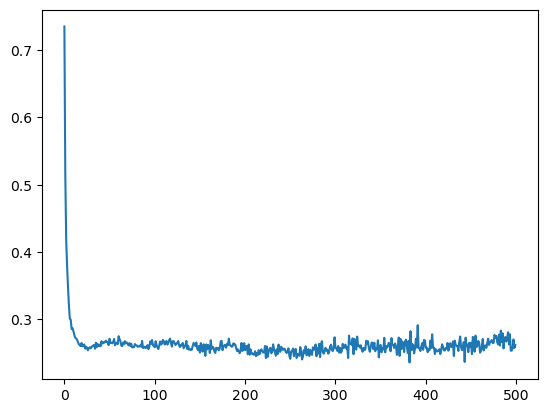

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [19]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [20]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(X_scaled,y,epochs=10,batch_size=250,validation_split=0.2)
print(time.time() - start)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step - accuracy: 0.6102 - loss: 0.6695 - val_accuracy: 0.7500 - val_loss: 0.5987
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.6262 - loss: 0.6508 - val_accuracy: 0.7500 - val_loss: 0.5981
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.6554 - loss: 0.6396 - val_accuracy: 0.7625 - val_loss: 0.5953
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6577 - loss: 0.6304 - val_accuracy: 0.7875 - val_loss: 0.5945
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.6951 - loss: 0.6206 - val_accuracy: 0.8125 - val_loss: 0.5928
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.7061 - loss: 0.6125 - val_accuracy: 0.8375 - val_loss: 0.5928
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.7076 - loss: 0.6060 - val_accuracy: 0.8500 - val_loss: 0.5920
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.7253 - loss: 0.6002 - val_accuracy: 0.8500 - val_loss: 0.590

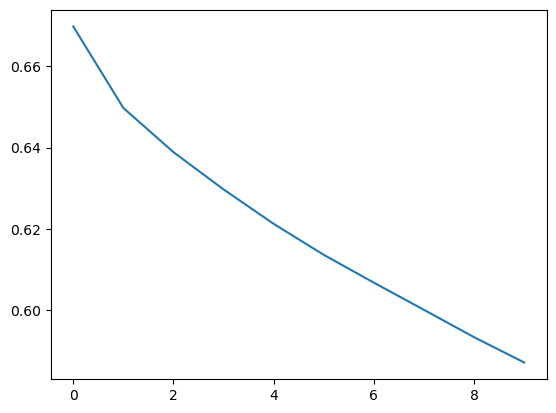

In [21]:
plt.plot(history.history['loss'])

In [22]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [24]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history = model.fit(X_scaled,y,epochs=10,batch_size=500,validation_split=0.2)
print(time.time() - start)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 895ms/step - accuracy: 0.8156 - loss: 0.6395 - val_accuracy: 0.5750 - val_loss: 0.7746
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.8156 - loss: 0.6340 - val_accuracy: 0.5750 - val_loss: 0.7750
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.8188 - loss: 0.6301 - val_accuracy: 0.5750 - val_loss: 0.7753
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.8188 - loss: 0.6269 - val_accuracy: 0.5750 - val_loss: 0.7756
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.8188 - loss: 0.6240 - val_accuracy: 0.5750 - val_loss: 0.7759
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.8188 - loss: 0.6214 - val_accuracy: 0.5625 - val_loss: 0.7761
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.8219 - loss: 0.6190 - val_accuracy: 0.5750 - val_loss: 0.7763
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.8219 - loss: 0.6167 - val_accuracy: 0.5750 - val_loss: 0.7765

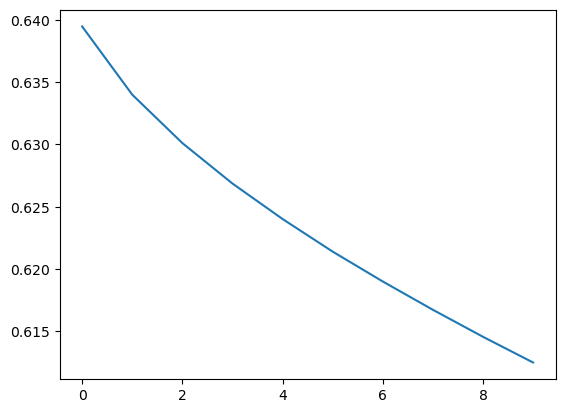

In [25]:
plt.plot(history.history['loss'])

# Why Sophisticated Gradient Descent Outperforms Basic GD on Local Minima

## The Local Minima Problem in Basic Gradient Descent

Basic gradient descent follows the update rule:
$$\theta_{t+1} = \theta_t - \eta \nabla_\theta J(\theta_t)$$

**Key limitations regarding local minima:**
1. **Gets stuck easily**: Follows gradient direction rigidly, stopping at the first minimum encountered
2. **No momentum**: Lacks "inertia" to escape shallow basins
3. **Fixed learning rate**: Cannot adapt step sizes based on landscape geometry

## How Advanced Variants Overcome These Limitations

### 1. Momentum-Based Methods (Momentum, NAG)
- **Physics-inspired velocity**: Accumulates gradient history in velocity term $v$:
  $$v_t = \gamma v_{t-1} + \eta \nabla_\theta J(\theta_t)$$
- **Escape mechanism**: Momentum carries the optimizer through:
  - Shallow local minima
  - Flat plateau regions
  - Noisy saddle points
- **NAG enhancement**: "Looks ahead" to make more informed updates

### 2. Stochasticity (SGD, Mini-Batch)
- **Noisy gradients**: Per-sample/batch variations:
  - Create "jitter" that can knock parameters out of local minima
  - Enable exploration of different basins
- **Empirical evidence**: Often finds better generalizing solutions than full-batch GD

### 3. Adaptive Methods (Adam, RMSprop)
- **Parameter-wise scaling**: Automatic step size adjustment via:
  $$ \theta_i = \theta_i - \frac{\eta}{\sqrt{v_t} + \epsilon} m_t $$
  where $m_t$ is momentum and $v_t$ tracks gradient magnitudes
- **Benefits**:
  - Larger steps in flat directions (escaping plateaus)
  - Smaller steps near steep walls (preventing overshooting)

## Comparative Behavior at Critical Points

| Scenario            | Basic GD               | Advanced Variants               |
|---------------------|------------------------|----------------------------------|
| Shallow local minima | Gets stuck permanently | Escapes via momentum/noise       |
| Flat plateaus       | Extremely slow progress | Accelerates via adaptive rates   |
| Saddle points       | May stagnate           | Escapes via gradient variance    |
| Narrow valleys      | Oscillates wildly      | Stabilizes with parameter-wise adaptation |

## Theoretical Insights
- **Momentum methods**: Can be viewed as simulating a heavy ball with kinetic energy
- **Adaptive methods**: Implicitly approximate curvature information
- **SGD noise**: Acts as implicit regularization, biasing toward wider minima (often better for generalization)

## Practical Recommendations
1. **For deep networks**: Adam/RMSprop typically outperform basic GD
2. **When generalization matters**: SGD with momentum + learning rate decay often finds flatter minima
3. **For reproducibility**: May need to run multiple times to escape pathological initializations

> **Key Insight**: Sophisticated optimizers don't just converge faster - they fundamentally alter the optimization trajectory to explore the loss landscape more effectively.

![Image](https://github.com/user-attachments/assets/1fd19998-13fe-4a46-a7fa-11885c3bf07b)

![Image](https://github.com/user-attachments/assets/59d38236-b4b4-4aa1-b5df-464ea34fb023)